#                                        CoinMarketCap API

Based upon the online Project with Alex the Analyst - https://www.youtube.com/watch?v=KB2CtEDrglY&list=WL&index=26&t=75s

The purpose of this project is to create an Automated Crypto Website API Pull using Python.

An issue with this project is that the CoinMarketCap website only allows 333 data pulls on the free version and for some reason, each time the script is run is 'costs' 25 to run. Therefore, I am only able to run the function a few times before it no longer has access to pull the data.

Another issue is that the IOPub data rate is exceeded. This means that before running this notebook, the data rate limit needs to be increased in the anaconda prompt using the code below:

                            jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 

Note: Only some data cleaning will be done to the data in this project but not too much as the data is big and is quite messy and would take a considerable amount of time to do.

The code below is the code used to build the API used in this project. However, it will only be run once because it causes too many errors and only allows 1 or 2 uses before the data cap is reached. Therefore, the cells which contain this code will be changed to 'Raw NB Convert' to avoid the problems and future confusion. Within the function of the code for the API, there are lines of code which capture the most recent data which has been pulled from the website and stores it into a .csv file. I will use the data within this file for the analysis and visualisations.

### Getting-started code from the documentation from the CoinMarketCap website

### Use json_normalize to normalize the data to provide a clearer visual of the data and the columns

### Creating a function to automate the process

#### Create a script to run the function

Checking the df is saved to .csv and is appended for each run

In [12]:
df_csv = pd.read_csv(r'C:\Users\Liam\Documents\Personal Projects\Project 5 - Coin Market API\API.csv')
df_csv.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.906385e+07,1.906385e+07,NaN,1,NaN,NaN,2022-06-10T16:55:00.000Z,29019.203921,2.751788e+10,23.9998,-1.385207,-4.260402,-1.627740,-4.619070,-28.880263,-25.818890,5.532178e+11,46.6000,6.094033e+11,2022-06-10T16:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637
1,1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.211217e+08,1.211217e+08,NaN,2,NaN,NaN,2022-06-10T16:54:00.000Z,1674.341723,1.649001e+10,32.7269,-3.195848,-7.280173,-4.761133,-24.569130,-44.596736,-35.430314,2.027991e+11,17.0827,2.027991e+11,2022-06-10T16:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637
2,2,825,Tether,USDT,tether,34566,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.249748e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-10T16:54:00.000Z,0.999242,4.664098e+10,8.3636,-0.010127,-0.011746,0.006560,0.115359,-0.111221,-0.092810,7.244255e+10,6.1022,7.965022e+10,2022-06-10T16:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-10 16:55:44.674637
3,3,3408,USD Coin,USDC,usd-coin,4363,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.370046e+10,5.370046e+10,NaN,4,NaN,NaN,2022-06-10T16:54:00.000Z,1.000075,4.180913e+09,21.1153,-0.003855,-0.040371,0.002879,0.035706,0.002596,0.000674,5.370449e+10,4.5247,5.370449e+10,2022-06-10T16:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-10 16:55:44.674637
4,4,1839,BNB,BNB,bnb,944,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-10T16:54:00.000Z,286.181988,1.280390e+09,53.5089,-1.643350,-1.921396,-3.369413,0.923345,-28.573960,-24.172505,4.672693e+10,3.9369,4.725344e+10,2022-06-10T16:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637


## Using the .csv file as the data

In [17]:
import pandas as pd
df_csv = pd.read_csv(r'C:\Users\Liam\Documents\Personal Projects\Project 5 - Coin Market API\API.csv')
df_csv.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19063850.00000,19063850.00000,NaN,1,NaN,NaN,2022-06-10T16:55:00.000Z,29019.20392,27517877054.34438,23.99980,-1.38521,-4.26040,-1.62774,-4.61907,-28.88026,-25.81889,553217750666.04382,46.60000,609403282337.34998,2022-06-10T16:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637
1,1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121121661.62400,121121661.62400,NaN,2,NaN,NaN,2022-06-10T16:54:00.000Z,1674.34172,16490009511.94845,32.72690,-3.19585,-7.28017,-4.76113,-24.56913,-44.59674,-35.43031,202799051606.42001,17.08270,202799051606.42001,2022-06-10T16:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637
2,2,825,Tether,USDT,tether,34566,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72497481448.78677,79710622660.05101,NaN,3,NaN,NaN,2022-06-10T16:54:00.000Z,0.99924,46640980140.75125,8.36360,-0.01013,-0.01175,0.00656,0.11536,-0.11122,-0.09281,72442546191.41072,6.10220,79650221615.99001,2022-06-10T16:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-10 16:55:44.674637
3,3,3408,USD Coin,USDC,usd-coin,4363,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,53700459999.81810,53700459999.81810,NaN,4,NaN,NaN,2022-06-10T16:54:00.000Z,1.00008,4180912856.78511,21.11530,-0.00386,-0.04037,0.00288,0.03571,0.00260,0.00067,53704488360.04681,4.52470,53704488360.05000,2022-06-10T16:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-10 16:55:44.674637
4,4,1839,BNB,BNB,bnb,944,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-10T16:54:00.000Z,286.18199,1280389979.46618,53.50890,-1.64335,-1.92140,-3.36941,0.92335,-28.57396,-24.17250,46726929177.05565,3.93690,47253442611.54000,2022-06-10T16:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 16:55:44.674637


## Data Cleaning

Changing from scientific notation to a more readable format

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' %x) 

Group by name and average the percent change over different periods

In [27]:
df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 
                               'quote.USD.percent_change_24h', 
                               'quote.USD.percent_change_7d', 
                               'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d',
                               'quote.USD.percent_change_90d']].mean()

df.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.90378,1.19180,-27.84483,-27.14991,-45.84066,-46.39441
Ethereum,1.88424,1.35543,-33.94530,-41.67713,-60.86613,-57.72791
Tether,0.01260,-0.00262,-0.04030,-0.01249,-0.13667,-0.15950
USD Coin,0.02667,0.03524,0.06008,0.02933,0.06818,0.05879
BNB,1.30812,2.97048,-22.69632,-25.42809,-46.25386,-42.44269


The df is reduced so that the visuals are cleaner and not packed.

In [28]:
df2 = df2.iloc[0:11]
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.90378,1.19180,-27.84483,-27.14991,-45.84066,-46.39441
Ethereum,1.88424,1.35543,-33.94530,-41.67713,-60.86613,-57.72791
Tether,0.01260,-0.00262,-0.04030,-0.01249,-0.13667,-0.15950
USD Coin,0.02667,0.03524,0.06008,0.02933,0.06818,0.05879
BNB,1.30812,2.97048,-22.69632,-25.42809,-46.25386,-42.44269
Binance USD,-0.00947,0.00950,-0.12873,0.02375,-0.09000,-0.00722
Cardano,1.40848,10.53311,-19.51650,-8.43078,-45.14025,-37.91285
XRP,1.26749,4.63351,-18.20407,-23.15119,-57.67504,-58.72286
Solana,1.99267,11.78160,-17.91525,-41.92504,-68.64733,-63.95449


df.stack() takes columns and transposes them to be the innermost index retaining the original index, creating a multi-level index. This is used so that analysis and visualisations can be done later on.

In [29]:
df3 = reduced_df2.stack()
df3

name                                  
Bitcoin   quote.USD.percent_change_1h      0.90378
          quote.USD.percent_change_24h     1.19180
          quote.USD.percent_change_7d    -27.84483
          quote.USD.percent_change_30d   -27.14991
          quote.USD.percent_change_60d   -45.84066
                                            ...   
Dogecoin  quote.USD.percent_change_24h     7.90375
          quote.USD.percent_change_7d    -26.87797
          quote.USD.percent_change_30d   -33.54723
          quote.USD.percent_change_60d   -59.33082
          quote.USD.percent_change_90d   -49.84026
Length: 66, dtype: float64

In [30]:
type(df3)

pandas.core.series.Series

In [31]:
df4 = df3.to_frame(name='values')
df4

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.90378
         quote.USD.percent_change_24h   1.19180
         quote.USD.percent_change_7d  -27.84483
         quote.USD.percent_change_30d -27.14991
         quote.USD.percent_change_60d -45.84066
...                                         ...
Dogecoin quote.USD.percent_change_24h   7.90375
         quote.USD.percent_change_7d  -26.87797
         quote.USD.percent_change_30d -33.54723
         quote.USD.percent_change_60d -59.33082
         quote.USD.percent_change_90d -49.84026

[66 rows x 1 columns]

Creating an index

In [32]:
# with the reduced df, there are only 66 rows and so the range of the index is set to 66.
index = pd.Index(range(66))
df5 = df4.set_index(index)
df5

,values
0,0.90378
1,1.19180
2,-27.84483
3,-27.14991
4,-45.84066
...,...
61,7.90375
62,-26.87797
63,-33.54723
64,-59.33082


In [33]:
# reset the index to bring original index back
df6 = df4.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.90378
1,Bitcoin,quote.USD.percent_change_24h,1.19180
2,Bitcoin,quote.USD.percent_change_7d,-27.84483
3,Bitcoin,quote.USD.percent_change_30d,-27.14991
4,Bitcoin,quote.USD.percent_change_60d,-45.84066
...,...,...,...
61,Dogecoin,quote.USD.percent_change_24h,7.90375
62,Dogecoin,quote.USD.percent_change_7d,-26.87797
63,Dogecoin,quote.USD.percent_change_30d,-33.54723
64,Dogecoin,quote.USD.percent_change_60d,-59.33082


In [34]:
# rename the new column apropriately
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.90378
1,Bitcoin,quote.USD.percent_change_24h,1.19180
2,Bitcoin,quote.USD.percent_change_7d,-27.84483
3,Bitcoin,quote.USD.percent_change_30d,-27.14991
4,Bitcoin,quote.USD.percent_change_60d,-45.84066
...,...,...,...
61,Dogecoin,quote.USD.percent_change_24h,7.90375
62,Dogecoin,quote.USD.percent_change_7d,-26.87797
63,Dogecoin,quote.USD.percent_change_30d,-33.54723
64,Dogecoin,quote.USD.percent_change_60d,-59.33082


## Creating Visualisations

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

### A visualisation showing the stability of each coin

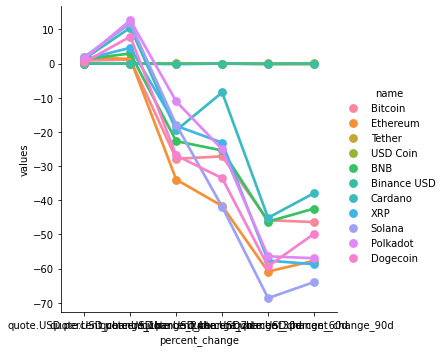

In [36]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

The x-axis on the plot above is messy and hard to read. Therefore, the labels for percent_change will be renamed.

In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 
                                                       'quote.USD.percent_change_24h', 
                                                       'quote.USD.percent_change_7d', 
                                                       'quote.USD.percent_change_30d', 
                                                       'quote.USD.percent_change_60d', 
                                                       'quote.USD.percent_change_90d'],
                                                       ['1h', '24h', '7d', '30d', '60d', '90d'])

In [38]:
df7['percent_change'].value_counts()

1h     11
24h    11
7d     11
30d    11
60d    11
90d    11
Name: percent_change, dtype: int64

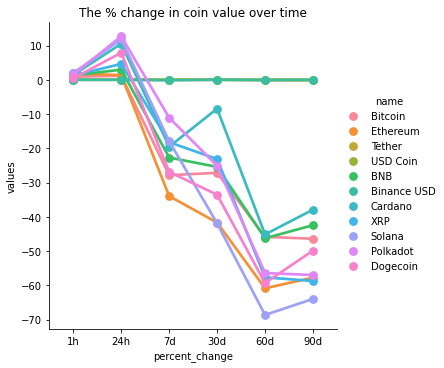

In [39]:
title = 'The % change in coin value over time'
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point').set(title=title)

### Looking into the price of each coin

In [44]:
df8 = df_csv[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,29019.20392,2022-06-10 16:55:44.674637
1,Ethereum,1674.34172,2022-06-10 16:55:44.674637
2,Tether,0.99924,2022-06-10 16:55:44.674637
3,USD Coin,1.00008,2022-06-10 16:55:44.674637
4,BNB,286.18199,2022-06-10 16:55:44.674637
...,...,...,...
34995,BSC TOOLS,0.03513,2022-06-10 17:08:55.525989
34996,PornVerse,0.00077,2022-06-10 17:08:55.525989
34997,Brixel War,0.00043,2022-06-10 17:08:55.525989
34998,MarsRise,0.00000,2022-06-10 17:08:55.525989


Investigating further into the price of just one coin e.g. Bitcoin

In [46]:
df9 = df8.query("name == 'Bitcoin'")
df9 = df9.set_index('name')
df9 = df9.reset_index()
df9

,name,quote.USD.price,timestamp
0,Bitcoin,29019.20392,2022-06-10 16:55:44.674637
1,Bitcoin,29046.32785,2022-06-10 17:00:44.019291
2,Bitcoin,29057.66680,2022-06-10 17:02:52.214028
3,Bitcoin,29011.49568,2022-06-10 17:05:24.273800
4,Bitcoin,29024.53339,2022-06-10 17:06:30.530407
5,Bitcoin,29024.53339,2022-06-10 17:07:17.053061
6,Bitcoin,29044.84755,2022-06-10 17:08:55.525989


#### Creating a timeseries plot of the price of Bitcoin 

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

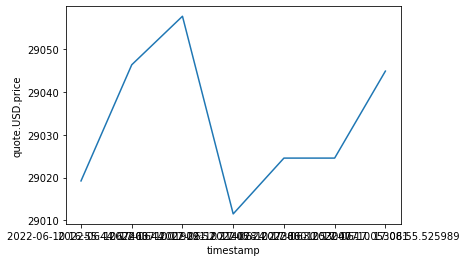

In [48]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)

Again, the labels on the x-axis are hard to read. Adding a rotation parameter to these labels will make them clearer.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

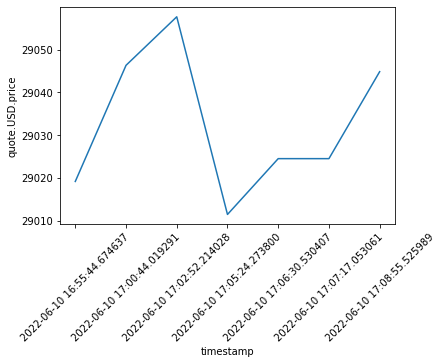

In [49]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)
plt.xticks(rotation=45)

This can be further improved by reducing the timestamp to datetime.

In [53]:
df10 = df9['timestamp'].str.split(' ', expand=True)
df11 = df9.join(df10, how='right')
df12 = df11.drop(['timestamp', 0], axis=1)
df13 = df11[1].str.split('.', expand=True)
df14 = df13.drop([1], axis=1)
df15 = df12.join(df14, how='right')
df16 = df15.drop([1], axis=1)
df16.rename(columns={0:'time'}, inplace=True)

# This step could most likely be completed easier and in a more efficient way. However, I don't know another way just yet
# and this way allows me to make the changes step by step.

df16

,name,quote.USD.price,time
0,Bitcoin,29019.20392,16:55:44
1,Bitcoin,29046.32785,17:00:44
2,Bitcoin,29057.66680,17:02:52
3,Bitcoin,29011.49568,17:05:24
4,Bitcoin,29024.53339,17:06:30
5,Bitcoin,29024.53339,17:07:17
6,Bitcoin,29044.84755,17:08:55


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

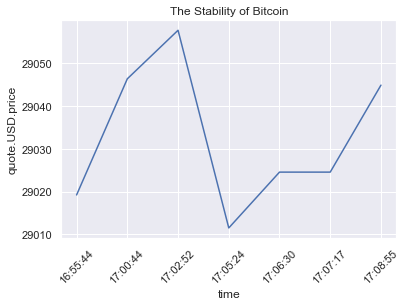

In [57]:
sns.set_theme(style="darkgrid")
title = 'The Stability of Bitcoin'
sns.lineplot(x='time', y='quote.USD.price', data=df16).set(title=title)
plt.xticks(rotation=45)
